# Set-Up

## Module Importing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats


import ooc_biosensing_binding_assay_analysis

## Aesthetic Settings

Below is where the aesthetic settings for graphs produced will be set/adjusted. 

In [2]:
import matplotlib.pylab as pylab

sns.set_theme(style='white')

params = {'legend.fontsize': 25,
          'figure.figsize': (15, 7.5),
          'axes.labelsize': 30,
          'axes.titlesize':30,
          'xtick.labelsize':25,
          'ytick.labelsize':25,
          'figure.dpi': 100}

pylab.rcParams.update(params)

# Configuration, Data Loading, and Initial Visualization

We will begin by, first, creating a dataframe populated with resonance peak position time profiles corresponding to the microring resonators ('sensors') optically interrogated as part of our experiment.  In order to do this, we will specify three directories: that associated with the sequentially acquired optical transmission spectra (sweeps), that associated with the logging CSV file populated with data from the Fluigent fluid control system, and one into which the output of this notebook (figures, categorized tables) will be stored (which should be created prior to running the below scripts). 

In [3]:
# Specify the path to the directory containing the "peak_shifts".mat file
sweeps_path = '/Users/vinny/Sync/Main/Research/Project Work/Experimental/Biosensor/Organ-On-Chip Biosensing/Pilot Studies/Phase Ib/Trial Ib/Sweeps'

# Specify the path to the directory containing the fluigent log files associated with your optical data
fluigent_path = '/Users/vinny/Sync/Main/Research/Project Work/Experimental/Biosensor/Organ-On-Chip Biosensing/Pilot Studies/Phase Ib/Trial Ib/Fluigent_Logs'

# Specify the path to the directory into which you would like the below scripts' output to be stored; create folders named 'Bulk RI' and 'Binding Assay' within this path to separate associated outputs
save_path = '/Users/vinny/Sync/Main/Research/Project Work/Experimental/Biosensor/Organ-On-Chip Biosensing/Pilot Studies/Phase Ib/Trial Ib/Analysis'

We will now define a dictionary that defines the relevant parameters associated with each sensor; this will include the fluidic channel, pressure channel (i.e. Fluigent flow controller channel), and any experimental grouping criteria; this mapping will be used in later functions to label calculated values as well as be saved as a text file for future reference. We will also define an experimental identifier string, which will be added to dataframes generated later in the notebook for future inter-experiment comparison. 

In [4]:
sensor_mapping = {'Sensor 1': {'Pressure Channel': 2, 'Fluidic Channel': 'Top', 'IL-8 Concentration (pg/mL)': 0},
                  'Sensor 2': {'Pressure Channel': 1, 'Fluidic Channel': 'Bottom', 'IL-8 Concentration (pg/mL)': 3125}, 
                  'Sensor 3': {'Pressure Channel': 2, 'Fluidic Channel': 'Top', 'IL-8 Concentration (pg/mL)': 0},
                  'Sensor 4': {'Pressure Channel': 1, 'Fluidic Channel': 'Bottom', 'IL-8 Concentration (pg/mL)': 3125},
                  'Sensor 5': {'Pressure Channel': 2, 'Fluidic Channel': 'Top', 'IL-8 Concentration (pg/mL)': 0},
                  'Sensor 6': {'Pressure Channel': 1, 'Fluidic Channel': 'Bottom', 'IL-8 Concentration (pg/mL)': 3125},
                  'Sensor 7': {'Pressure Channel': 2, 'Fluidic Channel': 'Top', 'IL-8 Concentration (pg/mL)': 0}, 
                  'Sensor 8': {'Pressure Channel': 1, 'Fluidic Channel': 'Bottom', 'IL-8 Concentration (pg/mL)': 3125}}

experiment_id = 'Pilot Phase Ib Trial Ib'

We will also define the start and end sweeps corresponding to the pre-assay bulk refractive index characterization as well as the binding assay; these will allow us to generate dataframes with corresponding fluidic information later in the notebook (the Fluigent fluid control system generates a new CSV file when a protocol is initiated and, currently, we use separate protocols for these two experimental stages). 

In [5]:
bulk_ri_start, bulk_ri_end = 275, 428
binding_assay_start, binding_assay_end = 445, None

We will now call a function to extract resonance peak position data from a matlab file (generated by the retrospective_analysis_gui.py script) and populate a dataframe with those vectors.

In [6]:
sensor_data = ooc_biosensing_binding_assay_analysis.extract_peak_positions(sweeps_path)

In [22]:
sensor_data

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Time
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.000018,-0.000293,-0.000152,-0.000274,0.000036,-0.000332,-0.000057,-0.000101,0.776843
2,-0.000040,-0.000332,-0.000117,-0.000368,-0.000067,-0.000467,-0.000130,-0.000087,1.214595
3,-0.000027,-0.000256,-0.000162,-0.000294,-0.000043,-0.000343,-0.000072,-0.000013,1.590840
4,-0.000093,-0.000030,-0.000117,-0.000061,-0.000099,0.000020,-0.000113,0.000201,1.977522
...,...,...,...,...,...,...,...,...,...
1152,3.754173,3.935508,3.799067,3.838360,3.800593,3.831766,3.896326,3.856947,446.878472
1153,3.754816,3.935078,3.799970,3.838069,3.801608,3.831348,3.897217,3.856390,447.245365
1154,3.755208,3.935227,3.800047,3.838086,3.801761,3.831558,3.897284,3.856622,447.615067
1155,3.755944,3.935991,3.800694,3.838948,3.802365,3.832325,3.898318,3.857573,447.987908


We will now visualize the continuously acquired peak position profiles; this would generally include a hydration period, a pre-assay bulk refractive index characterization, and the binding assay.  The latter segments will be quantitatively assessed later in this notebook. 

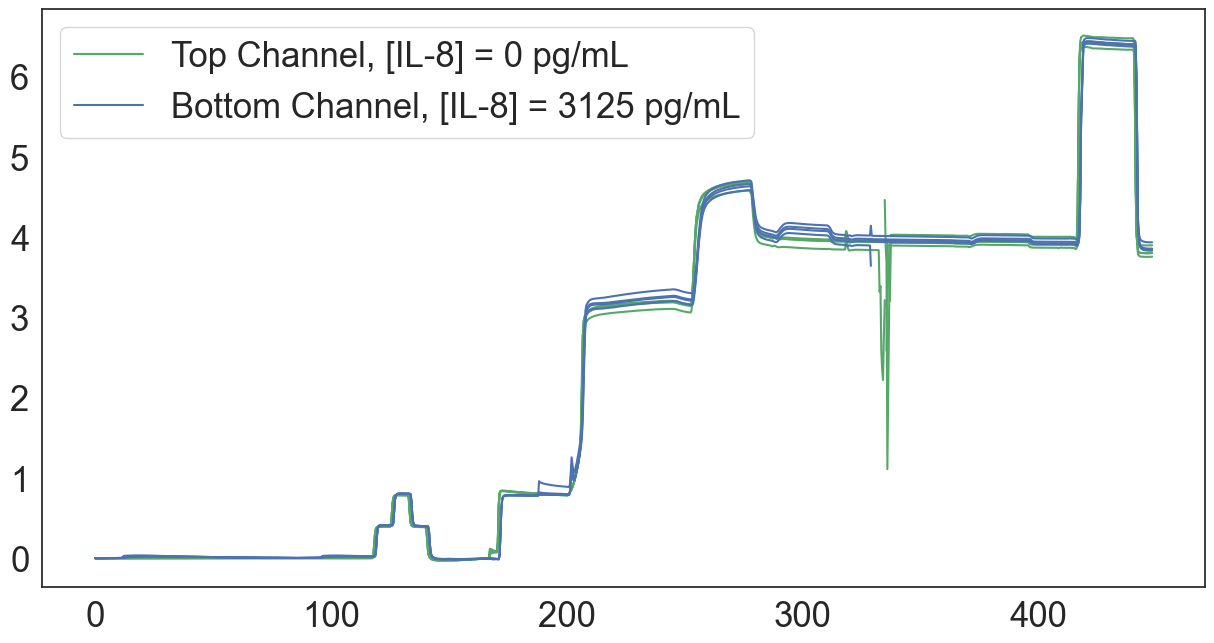

In [7]:
plt.plot(sensor_data['Time'], sensor_data['Sensor 1'], 'g', label = 'Top Channel, [IL-8] = 0 pg/mL')
plt.plot(sensor_data['Time'], sensor_data['Sensor 3'], 'g')
plt.plot(sensor_data['Time'], sensor_data['Sensor 5'], 'g')
plt.plot(sensor_data['Time'], sensor_data['Sensor 7'], 'g')

plt.plot(sensor_data['Time'], sensor_data['Sensor 2'], 'b', label = 'Bottom Channel, [IL-8] = 3125 pg/mL')
plt.plot(sensor_data['Time'], sensor_data['Sensor 4'], 'b')
plt.plot(sensor_data['Time'], sensor_data['Sensor 6'], 'b')
plt.plot(sensor_data['Time'], sensor_data['Sensor 8'], 'b')

plt.legend()
plt.savefig(save_path+'/Continuous_Peak_Tracking.png', dpi=600)

# Pre-Assay Bulk RI Characterization

We will now analyze bulk refractive index characterization; this is performed to control for sensor sensitivity within and across assays.  The first step will be to create a new dataframe with optical information corresponding to this stage of the experiment.

## Data Processing

In [8]:
# Create a new dataframe including only the relavent rows of the sensor dataframe
bulk_ri_sensor_data = sensor_data.iloc[bulk_ri_start:bulk_ri_end, :]

# Reset values to be relative to the first sweep in the new dataframe, as relative shifts are of greatest relavence
bulk_ri_sensor_data -= bulk_ri_sensor_data.iloc[0]

# Create a new column ('Sweep') to preserve sweep number and reset the dataframe index
bulk_ri_sensor_data.reset_index(names='Sweep', inplace=True)

The next step is to call two functions from the last module imported at the beginning of this notebook; the first extracts the peak positions vs. time vectors in the matlab matrix supplied by the retrospective analysis python script and places them in a new dataframe. The second consolidates the optical information with fluidic control system information (e.g. pressure, flow-rate, and the fluid being delivered) based on the time information in both datasets.

In [9]:
bulk_ri_data = ooc_biosensing_binding_assay_analysis.consolidate_fluigent_data(bulk_ri_sensor_data, fluigent_path, save_path+'/Bulk RI', experiment_id, protocol_keyword='Bulk')

## Data Visualization

We will now visualize the resonance peak position profile over the course of the bulk refractive index characterization across our sensors; of import is the net shift associated with each step in the refractive index of solution delivered, and so we will also specify coordinates corresponding to stable sections of each refractive index step, using which differences (or net shifts) will be calculated. 

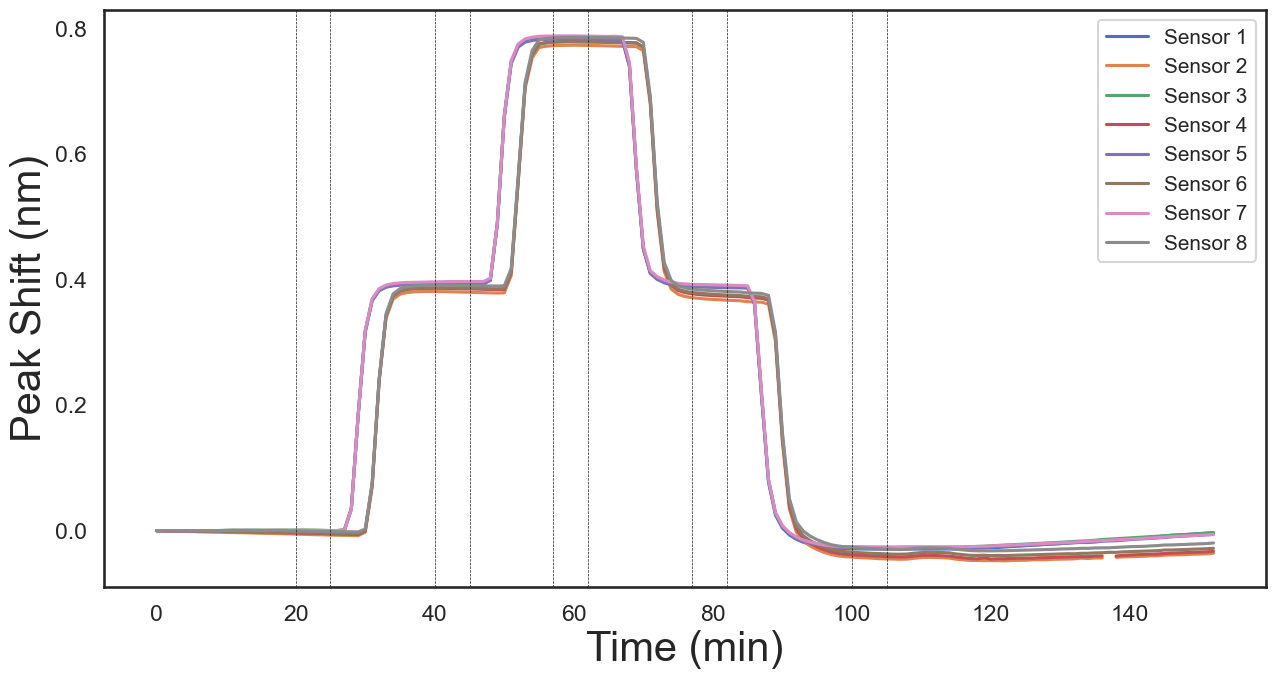

In [10]:
sns.set_theme(style='white', context='talk')

# Plot each sensor with labels and a legend
for column in bulk_ri_sensor_data:
    if 'Sensor' in column:
        plt.plot(bulk_ri_sensor_data[column], label = f'{column}')

plt.legend(fontsize=15)

# Specify sweep numbers, which will be used in net shift and sensor sensitivity calculations
coordinates = [20, 40, 57, 77, 100]

# Visualize the coordinates, to ensure they correspond to stable regions (and average values) within a refractive index step
for sweep in coordinates:
    plt.axvline(sweep, linestyle = "--", color='k', linewidth=0.5)
    plt.axvline(sweep + 5, linestyle = "--", color='k', linewidth=0.5)

plt.xlabel("Time (min)", fontsize=30)
plt.ylabel("Peak Shift (nm)", fontsize=30)

plt.savefig(save_path+'/Bulk RI/Peak_Tracking.png', dpi=600)

We will now populate a list with entries that describe the refractive index steps and feed that into the tabulate_net_peak_shifts function to calculate how much resonance peak positions shift with each 
refractive index step.

In [11]:
bulk_stages = ['ddW',
               'ddW -> 0.5X PBS', 
               '0.5X PBS -> PBS', 
               'PBS -> 0.5X PBS',
               '0.5X PBS -> ddW']

bulk_shifts = ooc_biosensing_binding_assay_analysis.tabulate_net_peak_shifts(bulk_ri_sensor_data, sensor_mapping, coordinates, bulk_stages, experiment_id, save_path+'/Bulk RI')

Now, we use the Pandas groupby method to visualize and save summary statistics across the sensors and refractive index steps. 

In [12]:
bulk_shifts.groupby(['Assay Stage'])['Peak Shift'].describe().to_csv(save_path + '/Bulk RI/Grouped_Data_Summary.csv')
bulk_shifts.groupby(['Assay Stage'])['Peak Shift'].describe()

,count,mean,std,min,25%,50%,75%,max
Assay Stage,,,,,,,,
0.5X PBS -> PBS,8.0,0.391720,0.001695,0.389468,0.390751,0.391881,0.392503,0.394479
0.5X PBS -> ddW,8.0,-0.414627,0.002538,-0.417840,-0.416032,-0.414989,-0.412702,-0.410729
PBS -> 0.5X PBS,8.0,-0.399138,0.003747,-0.403571,-0.402614,-0.398748,-0.395906,-0.394813
ddW -> 0.5X PBS,8.0,0.391770,0.003092,0.386477,0.389807,0.392008,0.393767,0.396245


## Data Analysis

A key objective of pre-assay bulk refractive index characterization is to control for inter-assay and intra-assay sensor sensitivity; the latter question can be investigated by viewing the dispersion across our sensor replicates associated with the delivery of fluids of known and consistent refractive index differences (in this case binary mixtures of isopropanol and ethanol).  The former can be interrogated with adding refractive index information associated with the fluids delivered to establish average sensor sensitivity in nm/RIU for comparison across assays and chips. 

In [13]:
min_cv_bulk = (abs((bulk_shifts.groupby(['Assay Stage'])['Peak Shift'].std()/bulk_shifts.groupby(['Assay Stage'])['Peak Shift'].mean())*100)).min()
max_cv_bulk = (abs((bulk_shifts.groupby(['Assay Stage'])['Peak Shift'].std()/bulk_shifts.groupby(['Assay Stage'])['Peak Shift'].mean())*100)).max()

print(f'Across the bulk RI sensitivity characterization steps, the CV ranged from {min_cv_bulk:.2f}% to {max_cv_bulk:.2f}%')

Across the bulk RI sensitivity characterization steps, the CV ranged from 0.43% to 0.94%


The numbers above provide some context as to what proportion of dispersion seen in the binding assay might be attributable to sensor-to-sensor sensitivity variability.

# Binding Assay

We will now proceed with analysis of the binding assay portion of our silicon photonics experiment; the first step will be to create a new dataframe populated with data points that correspond to sweeps and fluidic data captured during the binding assay.  The exact sweep numbers should be defined during the experiment and saved into a text document. 

## Data Processing

In [14]:
# Create a new dataframe including only the relavent rows of the sensor dataframe
binding_assay_sensor_data = sensor_data.iloc[binding_assay_start:binding_assay_end, :]

# Reset values to be relative to the first sweep in the new dataframe, as relative shifts are of greatest relavence
binding_assay_sensor_data -= binding_assay_sensor_data.iloc[0]

# Create a new column ('Sweep') to preserve sweep number and reset the dataframe index
binding_assay_sensor_data.reset_index(names='Sweep', inplace=True)

The next step is similar to that employed earlier for the bulk refractive index characterization data in that a function is called to consolidate fluidic information (in this case across two log CSVs, as the binding assay required two separate fluidic protocols due to unstable hydrogen peroxide solution being added midway through the experiment). 

In [15]:
binding_assay_data = ooc_biosensing_binding_assay_analysis.consolidate_fluigent_data(binding_assay_sensor_data, 
                                                                                     fluigent_path, 
                                                                                     save_path+'/Binding Assay', 
                                                                                     experiment_id, 
                                                                                     multi_part=True)

We will now populate a dictionary with a mapping that lists the relevant conditions associated with each microring resonator ('sensor'/optical channel).  This mapping is comprised of a nested dictionary, in which each sensor is a key with values comprising a dictionary with condition-value pairs (e.g., in this case, 'IL-8 Concentration'-3125 or Pressure Channel-1); this will feed into a later function as well as provide a reader with information contextualizing the dataframes and exported CSVs created by the functions above (it will, as such, be written to a text file and saved to the output path). 

## Visualization

The next step will be to visualize resonance peak position over the course of the assay; of chief concern is the fluid being delivered to the sensors, and so we will include a 1-D heatmap of the Fluigent's M-Switch position (the colors of which will represent the switch position and, therefore, the fluid being or soon to be delivered to the sensors). 

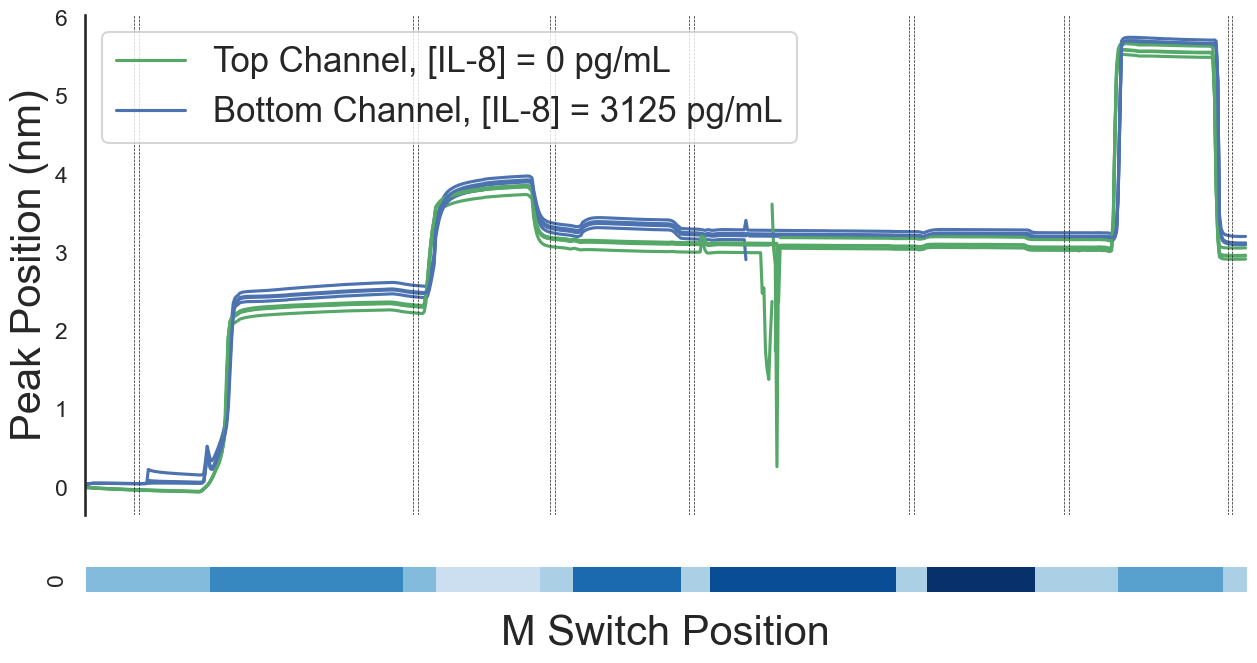

In [16]:
# Ensure first that, for all data points in our dataframe, there aren't differences between the position of each of the two M-Switches (one in each channel)
if (binding_assay_data['Valve Position (Channel 1)'] - binding_assay_data['Valve Position (Channel 2)']).sum() == 0:    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [20, 1]}) # create subplots for resonance peak positions (top) and M-Switch heatmap (bottom)

    # Resonance peak position 
    ax1.plot(binding_assay_data.iloc[:, 1], 'g', label='Top Channel, [IL-8] = 0 pg/mL')
    ax1.plot(binding_assay_data.iloc[:, 2], 'b', label='Bottom Channel, [IL-8] = 3125 pg/mL')
    ax1.plot(binding_assay_data.iloc[:, 3], 'g')
    ax1.plot(binding_assay_data.iloc[:, 4], 'b')
    ax1.plot(binding_assay_data.iloc[:, 5], 'g')
    ax1.plot(binding_assay_data.iloc[:, 6], 'b')
    ax1.plot(binding_assay_data.iloc[:, 7], 'g')
    ax1.plot(binding_assay_data.iloc[:, 8], 'b')

    ax1.set_xticks([0])
    ax1.legend(fontsize=25)

    ax1.spines.bottom.set_visible(False)
    ax1.spines.right.set_visible(False)
    ax1.spines.top.set_visible(False)
    ax1.set_ylabel("Peak Position (nm)", fontsize=30)

    # M-Switch position heatmap
    sns.heatmap([binding_assay_data['Valve Position (Channel 1)']], ax = ax2, cbar=False, cmap='Blues')

    ax2.set_xlabel('M Switch Position', fontsize=30)
    ax2.set_xticks([0])
    ax2.spines.left.set_visible(False)
    ax2.spines.bottom.set_visible(False)
    ax2.spines.right.set_visible(False)
    ax2.spines.top.set_visible(False)

    # Supply and visualize sweep numbers that correspond to inter-stage wash steps, which will be used to calculate net peak shifts
    coordinates = [30, 201, 285, 370, 505, 600, 700]

    for start_coord in coordinates:
        ax1.axvline(start_coord, linestyle = "--", color='k', linewidth=0.5)
        ax1.axvline(start_coord + 3, linestyle = "--", color='k', linewidth=0.5)

    plt.savefig(save_path + '/Binding Assay/Assay_Peak_Tracking.png', dpi=600)
    plt.savefig(save_path + '/Binding Assay/Assay_Peak_Tracking.svg')
else:
    print('There are sweeps for which the valve position differs between the two channels')

We will now supply our assay data, sensor mapping, and sweep numbers generated above into a function that will calculate net peak shifts and tabulate the data into a new dataframe.  The function also requires a list of assay stages to denote the shifts calculated using the coordinates, which we will manually populate prior to calling the function.

In [17]:
stages = ['Baseline PBS', 'Capture Antibody', 'BSA Block Challenge', 'IL-8', 'Detection', 'Streptavidin-HRP', 'Enzymatic Amplification']

binding_shifts = ooc_biosensing_binding_assay_analysis.tabulate_net_peak_shifts(binding_assay_data, sensor_mapping, coordinates, stages, experiment_id, save_path+'/Binding Assay')

We will now visualize the net peak shifts in a barplot

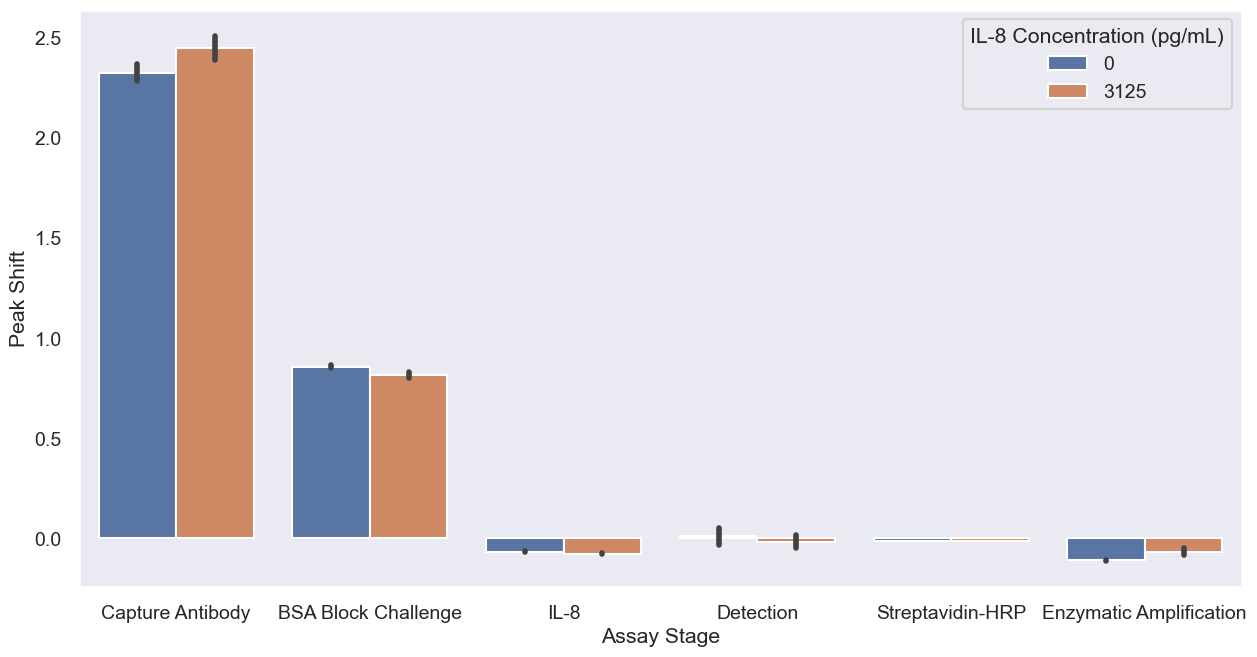

In [18]:
sns.set_theme(style='dark', context='talk', font_scale=0.85)

sns.barplot(data=binding_shifts, x='Assay Stage', y='Peak Shift', hue='IL-8 Concentration (pg/mL)', errorbar='sd')
plt.savefig(save_path + '/Binding Assay/Net_Shifts_Figure_Binding_Assay.svg')

Using the groupby Pandas method, we will generate descriptive statistics associated with the plot above and save it to a new csv.

In [19]:
binding_shifts.groupby(['Assay Stage', 'IL-8 Concentration (pg/mL)'])['Peak Shift'].describe().to_csv(save_path + '/Binding Assay/Grouped_Shift_Data_Summary.csv')
binding_shifts.groupby(['Assay Stage', 'IL-8 Concentration (pg/mL)'])['Peak Shift'].describe()

count      mean       std  \
Assay Stage             IL-8 Concentration (pg/mL)                              
BSA Block Challenge     0                             4.0  0.857075  0.007648   
                        3125                          4.0  0.816099  0.014108   
Capture Antibody        0                             4.0  2.326093  0.043649   
                        3125                          4.0  2.449163  0.060679   
Detection               0                             4.0  0.009545  0.040602   
                        3125                          4.0 -0.016887  0.031912   
Enzymatic Amplification 0                             4.0 -0.108757  0.003253   
                        3125                          4.0 -0.067007  0.018171   
IL-8                    0                             4.0 -0.065768  0.001276   
                        3125                          4.0 -0.075722  0.000738   
Streptavidin-HRP        0                             4.0 -0.013406  0.000596   
                        3125                          4.0 -0.013576  0.000882   

                                                         min       25%  \
Assay Stage             IL-8 Concentration (pg/mL)                       
BSA Block Challenge     0                           0.845608  0.856935   
                        3125                        0.797288  0.812664   
Capture Antibody        0                           2.261483  2.321386   
                        3125                        2.385144  2.421828   
Detection               0                          -0.025279 -0.025150   
                        3125                       -0.033807 -0.033373   
Enzymatic Amplification 0                          -0.113460 -0.109651   
                        3125                       -0.078919 -0.077347   
IL-8                    0                          -0.067197 -0.066594   
                        3125                       -0.076780 -0.075946   
Streptavidin-HRP        0                          -0.014145 -0.013755   
                        3125                       -0.014688 -0.013976   

                                                         50%       75%  \
Assay Stage             IL-8 Concentration (pg/mL)                       
BSA Block Challenge     0                           0.860734  0.860874   
                        3125                        0.817799  0.821234   
Capture Antibody        0                           2.342698  2.347406   
                        3125                        2.440211  2.467545   
Detection               0                           0.005738  0.040433   
                        3125                       -0.032350 -0.015864   
Enzymatic Amplification 0                          -0.107608 -0.106713   
                        3125                       -0.074516 -0.064175   
IL-8                    0                          -0.065773 -0.064947   
                        3125                       -0.075472 -0.075248   
Streptavidin-HRP        0                          -0.013318 -0.012969   
                        3125                       -0.013519 -0.013118   

                                                         max  
Assay Stage             IL-8 Concentration (pg/mL)            
BSA Block Challenge     0                           0.861226  
                        3125                        0.831509  
Capture Antibody        0                           2.357495  
                        3125                        2.531086  
Detection               0                           0.051982  
                        3125                        0.030958  
Enzymatic Amplification 0                          -0.106350  
                        3125                       -0.040077  
IL-8                    0                          -0.064328  
                        3125                       -0.075164  
Streptavidin-HRP        0                          -0.012842  
                        

## Data Analysis

We will pass the groupings obtained above into functions in the scipy statistics library that correspond to the appropriate statistical test.  We'll begin with a test for homoscedasticity, which will inform the next steps, and assume our data are normally distributed. 

In [20]:
scipy.stats.bartlett(binding_shifts[binding_shifts['Assay Stage'] == 'Enzymatic Amplification'].groupby(['IL-8 Concentration (pg/mL)'])['Peak Shift'].get_group(0),
                     binding_shifts[binding_shifts['Assay Stage'] == 'Enzymatic Amplification'].groupby(['IL-8 Concentration (pg/mL)'])['Peak Shift'].get_group(3125))

BartlettResult(statistic=5.4440167848516, pvalue=0.01963546388373444)

The p-value associated with Bartlett's test was above the 5% threshold to reject the null hypothesis that the constituents of the two groups we are comparing have homogenous variances; this supports the use of a Student's t-test. 

In [21]:
scipy.stats.ttest_ind(binding_shifts[binding_shifts['Assay Stage'] == 'Enzymatic Amplification'].groupby(['IL-8 Concentration (pg/mL)'])['Peak Shift'].get_group(0), 
                      binding_shifts[binding_shifts['Assay Stage'] == 'Enzymatic Amplification'].groupby(['IL-8 Concentration (pg/mL)'])['Peak Shift'].get_group(3125),
                      equal_var=True)

Ttest_indResult(statistic=-4.523366629816187, pvalue=0.004003233682586514)

Results from the t-test indicate there are significant differences at the 5% threshold between the positive and negative control group with respect to the net resonance peak shift associated with enzymatic amplification; in this case, however, it is clear that the results did not match our expectations.  While a significant difference between the negative and positive control would align with what we would have predicted a priori, we would expect a much higher value in the positive control group.  As such, generation of hypotheses as to the causes of these results and subsequent experimentation is indicated. 